In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
sys.path.append('..')

## Calculating Vaccine Coverage for Municipalities

In [3]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

### 10 municipalities with the most cases

In [4]:
first_10 = [355030., 130260., 150140., 410690., 150080., 351880., 130250.,
       330455., 351630., 160030.]

In [5]:
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')
mun_path = '../Data/municipalities.csv'
mun_file = pd.read_csv(mun_path)
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo']]
df_mun = df_mun.merge(mun_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'codigo')

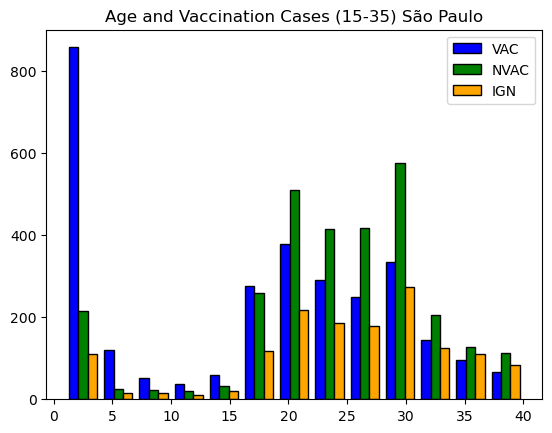

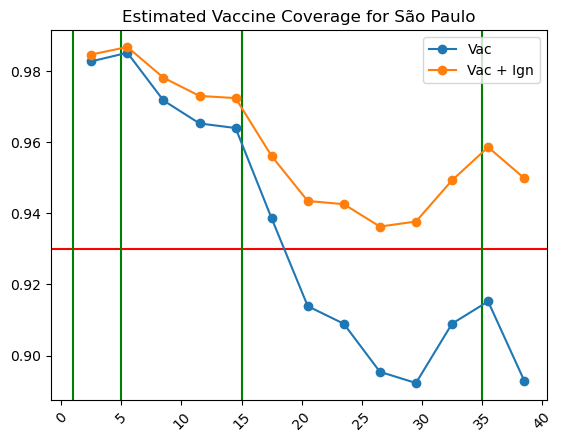

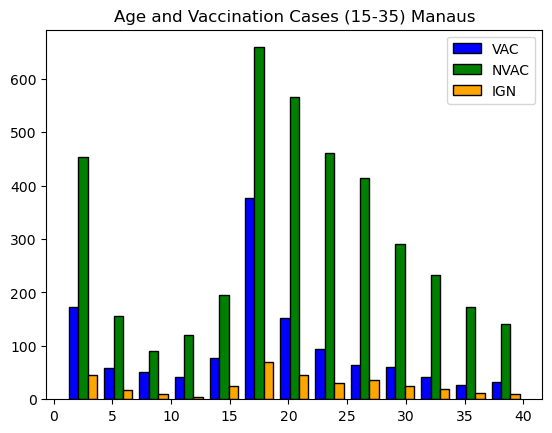

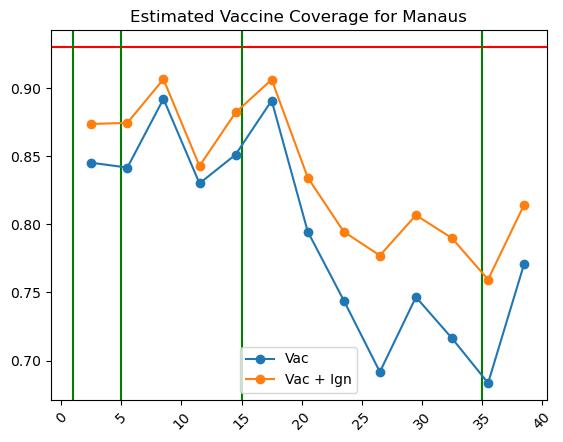

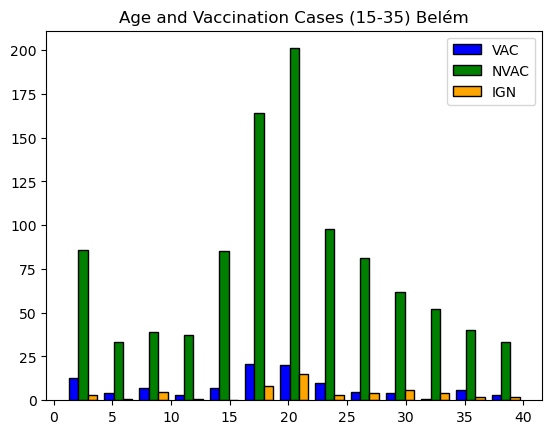

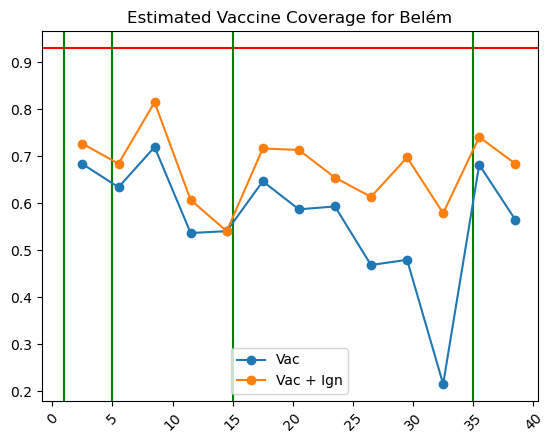

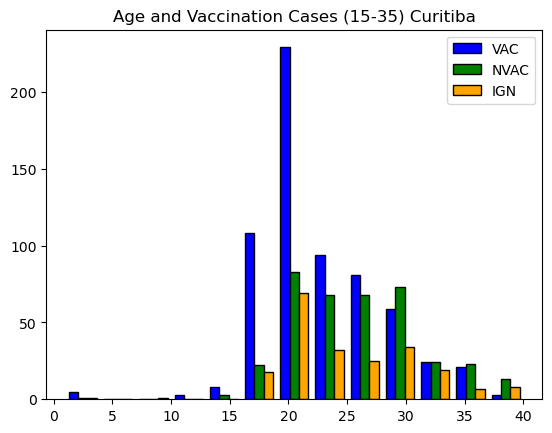

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_19580\3093095810.py:23: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)
C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_19580\3093095810.py:24: RuntimeWarning: invalid value encountered in divide
  p_vacs_2 = vacs_2/(vacs_2 + nvacs)


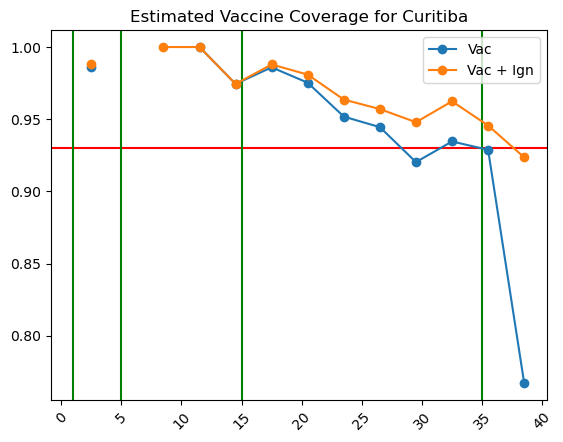

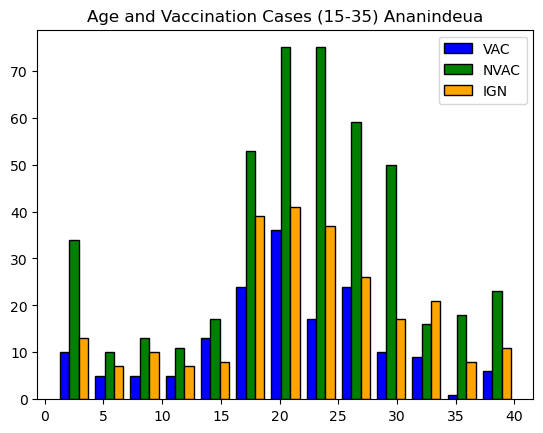

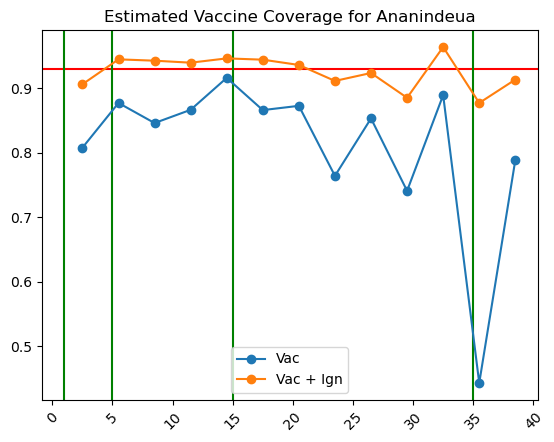

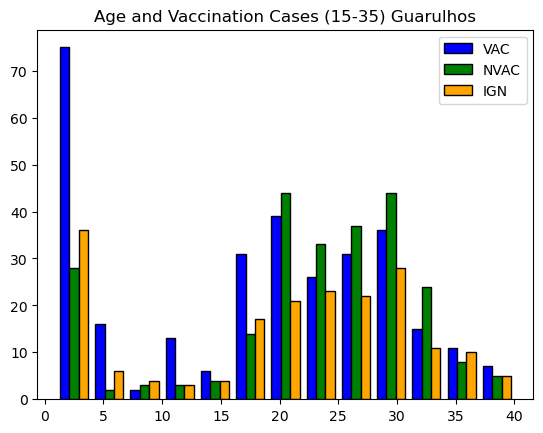

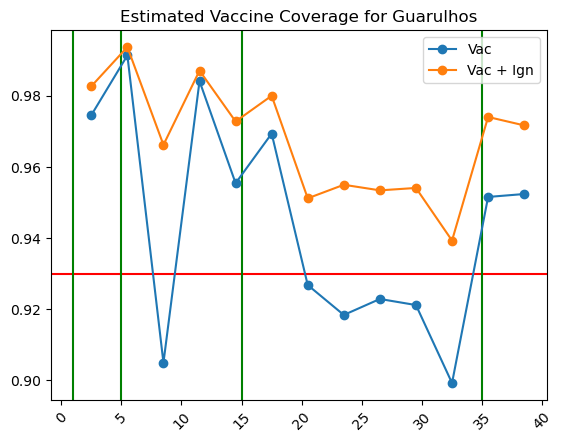

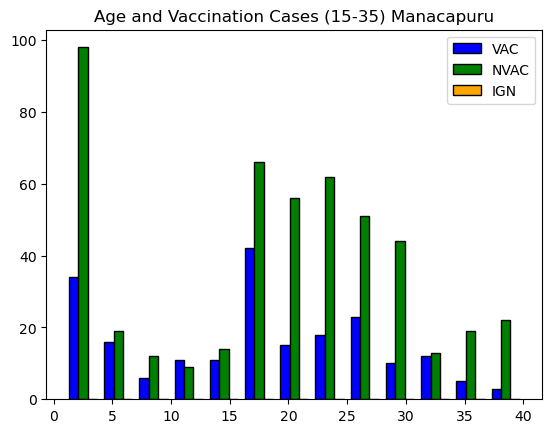

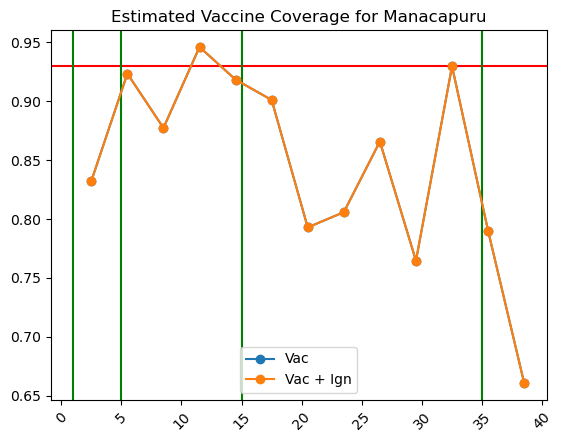

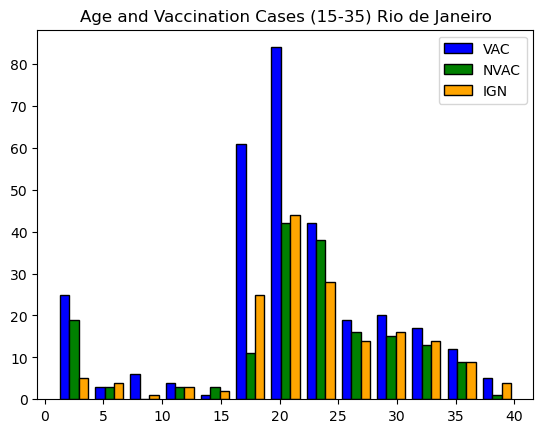

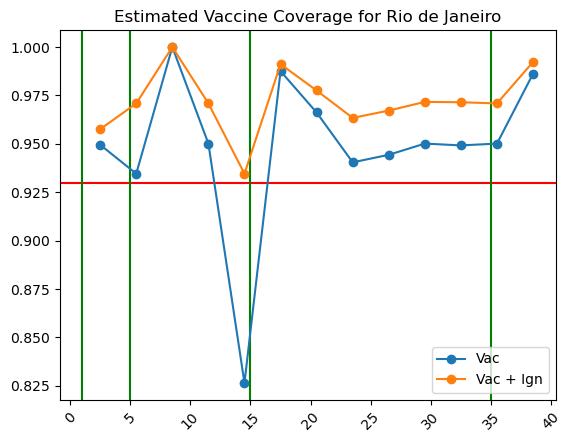

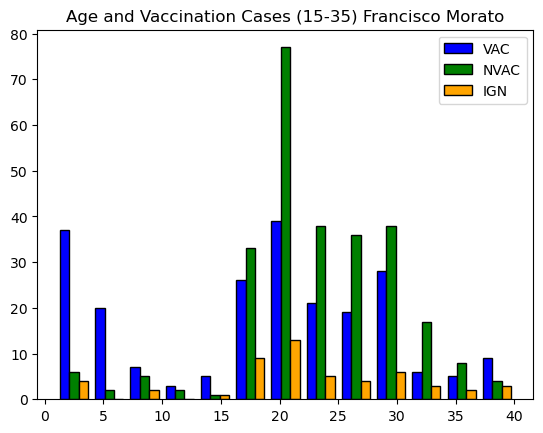

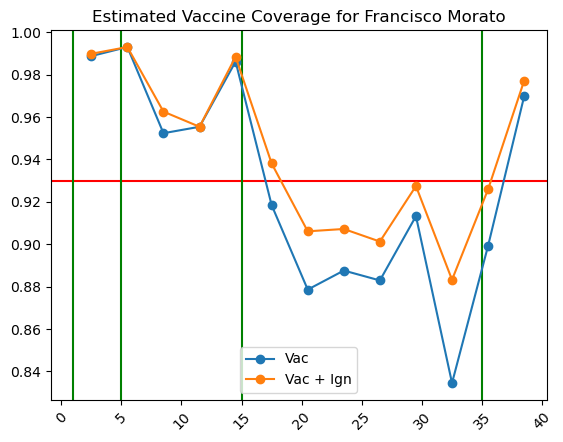

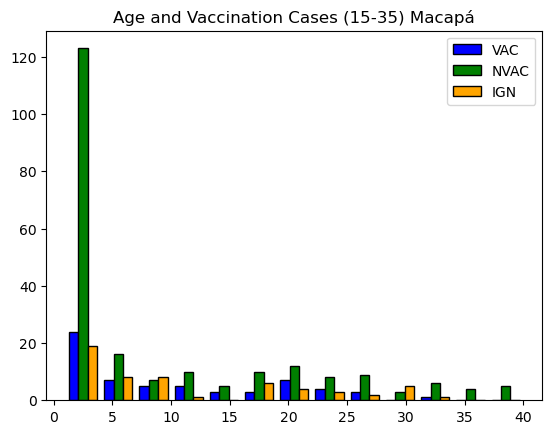

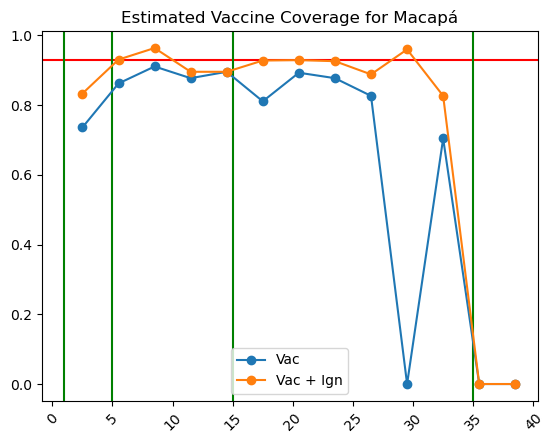

In [10]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] >= 1]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 1
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(min_age,max_age+1,3), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs_2 = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    p_vacs_2 = vacs_2/(vacs_2 + nvacs)
    c_vacs = []
    c_vacs_2 = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    for p in p_vacs_2:
        if(p == np.nan):
            c_vacs_2.append(np.nan)
        elif(p == 0):
            c_vacs_2.append(0)
        else:
            c_vacs_2.append(coverage_age(p,0.93))  
    plt.xticks(np.arange(0,max_age+1,5), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot((bins[1][:-1] + bins[1][1:])/2,c_vacs,'-o', label = 'Vac')
    plt.plot((bins[1][:-1] + bins[1][1:])/2,c_vacs_2,'-o', label = 'Vac + Ign')
    plt.legend()
    plt.show()